<a href="https://colab.research.google.com/github/Fabiane-Gaspar/Projeto_PUC_ML/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Biblioteca Pandas para leitura e análise dos Dados

### **1. Definição do Problema**

Desenvolver um modelo de previsão de churn de clientes para identificar e mitigar a perda de clientes, otimizando a retenção e a experiência do usuário.

**Objetivos**

1. Identificar clientes propensos a cancelar o serviço.
2. Analisar as características que influenciam o churn.
3. Desenvolver um modelo de previsão preciso para reduzir o churn.

Contexto

Utilizar uma base de dados de churn de clientes, onde o churn é definido como o número de clientes que cancelam o serviço em um período específico.







### **2. Importando as Bibliotecas**

Esse processo chama-se Classificação.
Para isso será utilizada as ferramentas:
- Scikit-Learn: que contém os algoritmos e funções necessárias para os projetos de classificação ou regressão;
- Pandas: para análise dos dados exploratórios;
- Plotly: Esta biblioteca é utilizada para criar gráficos interativos;
- Matplotlib: É uma biblioteca de plotagem que permite criar gráficos estáticos, animados e interativos em Python.


In [273]:
import pandas as pd #importando a biblioteca Pandas e apelidando de pd
import plotly.express as px #importando a biblioteca Plotly e apelidando de px gráficos interativos;
import matplotlib.pyplot as plt #importando a biblioteca Matplotlib e apelidando de plt biblioteca de plotagem
from sklearn.compose import make_column_transformer #cria um transformador de colunas.
from sklearn.preprocessing import OneHotEncoder #transforma dados categóricos em numéricos.
from sklearn.model_selection import train_test_split #dividir os dados em conjuntos de treinamento e teste.
from sklearn.tree import DecisionTreeClassifier #importando a biblioteca
from sklearn.tree import plot_tree #visualizar qual foi a regra utilizada pela árvore para a tomada de decisão
from sklearn.model_selection import KFold #validação cruzada
import numpy as np

## **3. Carregamento e Análise dos Dados**
Fazendo Upload dos dados e salvando em uma variável chamada *dados*
Os dados estão sendo lidos por: pd.read_csv() da biblioteca Pandas.

In [302]:
dados = pd.read_csv('/content/drive/MyDrive/Aulas/Classificação_Clientes/churn (1).csv') #upload dos dados e salvando em variáveis

In [275]:
dados #exibindo as 5 primeiras e as 5 ultimas linhas do data set

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,França,Homem,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,França,Homem,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,França,Mulher,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52,1


Nessa próxima etapa estamos usando o info() para detectarmos se temos dados faltante.
A falta de dados pode influenciar na compreensão dos padrões do clientes

In [276]:
dados.info() #verificando se temos dados faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


## **3.1 Analisando as Variáveis Categóricas**

Importando a biblioteca *plotly.express* para examinar nossos dados e verificar se temo alguma inconsistência, e garantir a qualidade dos dados.
Com essa análise podemos fazer correções antes de enviar as informações para nosso algoritimo.

Começaremos com a coluna "Churn", que é a variável alvo. Usaremos px.histograma(). Além disso, passaremos o parâmetro text_auto=True para colocar a informação numérica da contagem de cada uma das barras na própria barra:

In [277]:
px.histogram(dados, x='churn',text_auto = True)

Abaixo faremos a construção das barras com base em "Churn" para conseguirmos visualizar se existe uma diferença no padrão dos dados por "sexo_biologico". Assim, entenderemos, também, se determinado sexo influencia em no Churn. Para isso, usaremos o parâmetro color = 'Churn'.

Por fim, para agrupar as barras com base no estado civil, usaremos barmode = 'group'.


In [278]:
px.histogram(dados, x='sexo_biologico',text_auto = True, color='churn', barmode = 'group')

In [279]:
px.histogram(dados, x='pais',text_auto = True, color='churn', barmode = 'group')

## **3.2. Analisando as Variáveis Numéricas**

Para fazer isso, utilizaremos o Plotly com a função box().

Inicialmente, será a coluna "score_credito". Em seguida, faremos uma plotagem, separando por cor com base na Churn. Criaremos um boxplot para a não Churn, e um boxplot para sim Churn. Para fazer isso, usamos color = 'churn'.



In [280]:
px.box(dados, x = 'score_credito', color = 'churn')

In [281]:
px.box(dados, x = 'score_credito', color = 'churn')

In [282]:
px.box(dados, x = 'idade' , color = 'churn')

In [283]:
px.box(dados, x = 'saldo' , color = 'churn')

## 4. Separando as variáveis Alvo das variaveis Explicativas

Mostrar para o algoritimo que é a informação, ou seja a variável alvo que queremos prever e quais são as variáveis e colunas que serão utilizadas para explicar aquele resultado.

In [284]:
x = dados.drop('churn', axis = 1) #excluido a variavel churn e salvando em "x"
y = dados['churn'] #salvando apenas a variavel churn em "y"


In [285]:
x #conferindo a separação dados explicativos

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,França,Homem,39,5,0.00,2,1,0,96270.64
9996,15569892,516,França,Homem,35,10,57369.61,1,1,1,101699.77
9997,15584532,709,França,Mulher,36,7,0.00,1,0,1,42085.58
9998,15682355,772,Alemanha,Homem,42,3,75075.31,2,1,0,92888.52


In [286]:
y #conferindo a separação dados alvo

,churn
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


## 5. Transformando os dados em numeros binário

Na célula abaixo usaremos o código One Hot Encoding para fazer essa transformação.

O One-Hot Encoding funciona verificando as características de cada uma das colunas categóricas e transformando em 0 ou 1 e acrescenta mais colunas.

Para evitar a duplicidade de informação, passaremos um parâmetro para o One-Hot Encoder remover uma das colunas geradas quando há apenas duas categorias.


In [287]:
colunas = x.columns #variavel para guardar os nomes das colunas

In [288]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'), ['sexo_biologico', 'pais']
),
    remainder = 'passthrough',
    sparse_threshold=0)


Na próxima célula, foi usado x = one_hot.fit_transform(x). Aqui, a transformação será aplicada ao x e vai ser armazenada na mesma variável utilizada para armazenar as variáveis explicativas.


In [289]:
x = one_hot.fit_transform(x) #arnazenando variaveis explicativas

Estamos utilizando essa função a partir da base de dados original x para retornar o novo nome das colunas após o processo de transformação.


In [290]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__sexo_biologico_Mulher',
       'onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França', 'remainder__id_cliente',
       'remainder__score_credito', 'remainder__idade',
       'remainder__anos_de_cliente', 'remainder__saldo',
       'remainder__servicos_adquiridos', 'remainder__tem_cartao_credito',
       'remainder__membro_ativo', 'remainder__salario_estimado'],
      dtype=object)

In [291]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas)) #visualizando a transformação dos dados

,onehotencoder__sexo_biologico_Mulher,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,remainder__id_cliente,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__tem_cartao_credito,remainder__membro_ativo,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,1.0,0.0,1.0,0.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,0.0,0.0,1.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,0.0,0.0,1.0,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,1.0,0.0,1.0,0.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,15606229.0,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,0.0,0.0,0.0,1.0,15569892.0,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,0.0,0.0,1.0,15584532.0,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,0.0,1.0,0.0,0.0,15682355.0,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


## **6. Divisão do Treino e Teste dos Dados**

Para sabermos se a máquina está realmente aprendendo ou só decorando, precisamos dividir nossos dados em uma parte para teste. Iremos separar uma parte dos nossos dados, que será o conjunto de treinamento, onde ensinaremos o padrão dos nossos dados para o algoritmo, e a outra parte, que será a parte de teste.

A parte de teste será usada no momento de avaliar o desempenho, pois esses dados não foram vistos durante o treinamento

utilizaremos uma função da biblioteca scikit-learn, conhecida como train_test_split()

In [292]:
x_treino, x_teste, y_treino, y_teste = train_test_split (x,y)

## **7. Modelo do Algoritimo escolhido**
##Arvore de Decisão

Basicamente, a árvore compara se um valor é maior ou menor a partir dos valores de uma coluna do dataframe, e separa os dados com base no resultado dessa comparação. Portanto, aqueles dados que tiverem um valor maior que o valor estipulado pela árvore serão separados em um grupo, e aqueles que tiverem um valor menor serão separados em um grupo diferente.

### **7.1 Parâmetros:**

1. max_depth=3: Limita a profundidade da árvore a 3 níveis.
2. random_state=5: Define a semente aleatória para garantir reproducibilidade.

In [293]:
# Criar e treinar o modelo
arvore = DecisionTreeClassifier(max_depth = 3, random_state=5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

Após definição dos parâmetro, podemos fazer uma previsão usando a função predict.

Ela faz previsões de novos dados a partir da regra criada pela árvore

In [294]:
arvore.predict(x_teste) # Fazer previsões com os dados de teste

array([0, 0, 0, ..., 0, 0, 0])

Se quisermos visualizar quão acertivas foram as previsões, isto é, a taxa de acerto, podemos utilizar o método score().

In [295]:
arvore.score(x_teste, y_teste) # Avaliar o modelo

0.8396

## **8. Visualização da Arvore**

Pode-se também visualizar qual foi a regra utilizada pela árvore para a tomada de decisão.
Utilizando a função plot_tree
Para ajustar o tamanho do visual usaremos pyplot

Utilizado plot_tree() e passado os parâmetros para construir o gráfico. Primeiro parâmetro o modelo (arvore). Como segundo parâmetro, vamos passar filled = True. Para que no visual apareça nas cores laranja (classe "Não") e azul (classe "Sim").

Foi daod nome a essas classes, em vez de serem 0 e 1, para melhorar a visualização. Foi feito com o parâmetro class_names e atribuido os nomes "nao" e "sim" às classes 0 e 1, respectivamente.

O fontsize para o tamanho da letra
feature_names = nome_colunas para dar nome e ser representado as colunas

Por fim, foi usado o ";" ao final da função. Isso permite que, nessa biblioteca matplotlib, nenhuma informação textual apareça acima da visualização.


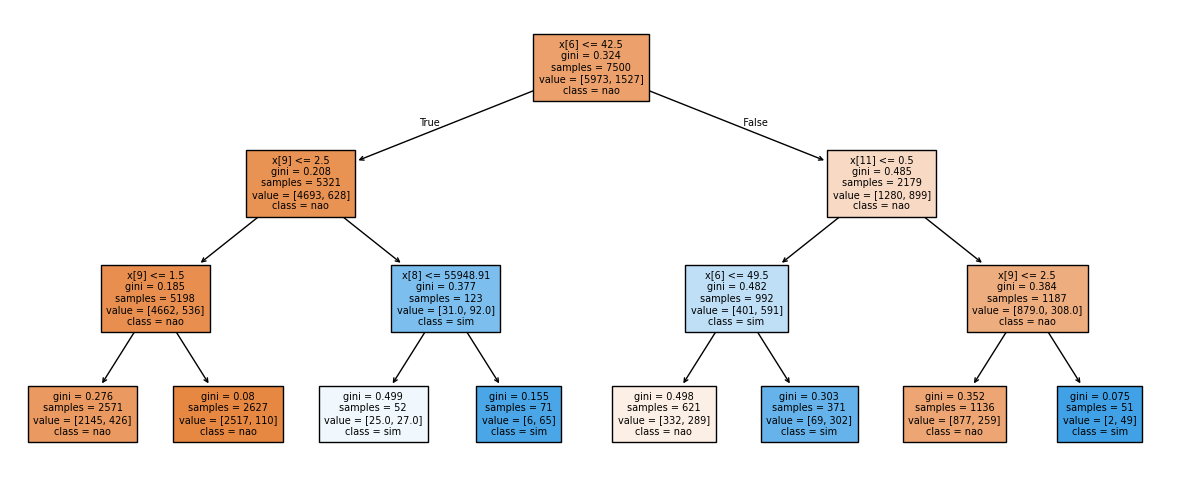

In [296]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7);


## **9. Acurácia**

In [297]:
arvore.score(x_treino, y_treino)

0.8418666666666667

In [298]:
arvore.score(x_teste, y_teste)

0.8396

## **10. Validação Cruzada

A validação cruzada (também conhecida como cross-validation) é uma técnica estatística utilizada para avaliar a precisão e robustez de modelos de Machine Learning. Ela ajuda a:

Objetivos

1. Avaliar o desempenho do modelo em novos dados.
2. Prevenir sobreajuste (overfitting) e subajuste (underfitting).
3. Selecionar os melhores parâmetros do modelo.
4. Estimar a variabilidade do modelo.


In [299]:
# Validação Cruzada Simples (K-Fold): Divide o conjunto de dados em K partes iguais.
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [300]:
# Validção cruzada
X = x
scores = [] # lista para armazenar pontuação
for treino, teste in kfold.split(X):
    x_treino, X_teste = X[treino], X[teste]
    y_treino, y_teste = y.iloc[treino], y.iloc[teste]

    arvore.fit(x_treino, y_treino) # treinanado o modelo
    score = arvore.score(X_teste, y_teste) # pontuação
    scores.append(score) #adicionando a pontualçao na lista

#  Exibir resultados da validação cruzada
print(f"Validação Cruzada - R^2 Scores: {scores}")
print(f"Validação Cruzada - R^2 Média: {np.mean(scores)}") # calculando a média
print(f"Validação Cruzada - R^2 Desvio Padrão: {np.std(scores)}") # calculando padrão


Validação Cruzada - R^2 Scores: [0.8485, 0.8365, 0.8315, 0.8465, 0.84]
Validação Cruzada - R^2 Média: 0.8406
Validação Cruzada - R^2 Desvio Padrão: 0.00628012738724304



## **11. Análise e Conclusão**

1. Validação Cruzada - R^2 Scores: Varia entre 0,8315 e 0,8485.
2. Validação Cruzada - R^2 Média: 0,8406.
3. Validação Cruzada - R^2 Desvio Padrão: 0,0063

4. Desempenho consistente: O modelo apresenta desempenho estável em todas as iterações.
5. Precisão alta: A média de R^2 (0,8406) indica que o modelo explica cerca de 84% da variância nos dados.
6. Variação baixa: O desvio padrão baixo (0,0063) sugere que os resultados são consistentes.

7. O modelo de Árvore de Decisão é eficaz para prever o alvo.
8. A validação cruzada confirma a robustez do modelo.
9. O modelo pode ser utilizado para previsões futuras.
